In [36]:
import pandas as pd
import os
from typing import Optional, Tuple, List, Dict, Union
from catboost import Pool, CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from src.data.loading import DataLoader
from src.features.feature_engineering import FeaturesMaker
from src.data.split import train_test_split_by_date
from src.model.catboost import CatBoostPredictor
from sklearn.linear_model import LinearRegression

In [37]:
dl = DataLoader()
store_sales = dl.load_store_sales('../data/store_sales_2.csv')
store_sales_dates = dl.load_dates('../data/store_sales_dates.csv')

In [38]:
fm = FeaturesMaker()
dataset = fm.make_features(store_sales, 'cnt', 61, 30, store_sales_dates)

In [39]:
dataset.head(3)

,store_id,item_id,cnt,cnt_lag_62,cnt_lag_63,cnt_lag_64,cnt_lag_65,cnt_lag_66,cnt_lag_67,cnt_lag_68,...,cnt_lag_88,cnt_lag_89,cnt_lag_90,cnt_lag_91,event_name,event_type,weekday,day,month,year
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,STORE_2,STORE_2_252,39,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,5,29,1,2011
2011-01-30,STORE_2,STORE_2_252,38,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,6,30,1,2011
2011-01-31,STORE_2,STORE_2_252,18,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,0,31,1,2011


In [41]:
dataset.index.max()

Timestamp('2016-01-21 00:00:00')

In [22]:
train_df, test_df = train_test_split_by_date(dataset, 'date', '2015-11-22')

In [23]:
cb = CatBoostPredictor()
cb.fit(train_df, 'cnt')

Model for store STORE_2 item STORE_2_252 fitted.


In [24]:
preds = cb.predict(test_df)

In [25]:
preds

,store_id,item_id,date,cnt_predict
0,STORE_2,STORE_2_252,2015-11-22,51.390344
1,STORE_2,STORE_2_252,2015-11-23,32.069384
2,STORE_2,STORE_2_252,2015-11-24,34.811476
3,STORE_2,STORE_2_252,2015-11-25,32.386972
4,STORE_2,STORE_2_252,2015-11-26,60.827055
...,...,...,...,...
56,STORE_2,STORE_2_252,2016-01-17,56.477136
57,STORE_2,STORE_2_252,2016-01-18,32.909473
58,STORE_2,STORE_2_252,2016-01-19,29.659986
59,STORE_2,STORE_2_252,2016-01-20,24.667420


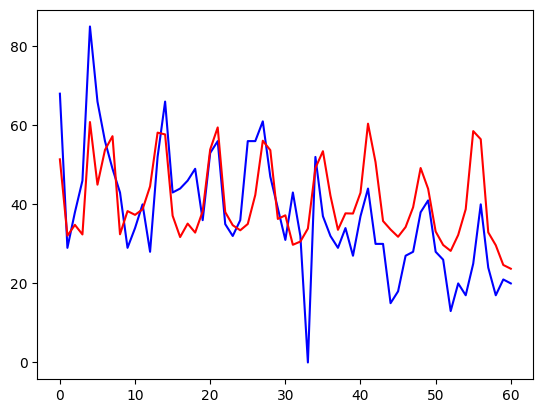

In [26]:
for store in preds['store_id'].unique():
    store_pred_df = preds[preds['store_id'] == store]
    store_test_df = test_df[test_df['store_id'] == store]

    plt.plot(store_test_df['cnt'].values, color='blue')
    plt.plot(store_pred_df['cnt_predict'].values, color='red')
    plt.show()

    

In [27]:
mean_absolute_error(test_df['cnt'].values, preds['cnt_predict'].values)

10.011245942500963